# Object Detection with YOLO and OpenCV

***Summary***
- Basic Image Operations with OpenCV
- Object Detection in Images
- Object Detection in Videos

***Table of Contents:*** 
- [Reading, Recoloring, and Displaying Images](#working-with-images)
- [Pretrained YOLO Model on Images](#pretrained)
- [Bounding Boxes](#bounding-boxes)
- [Cropping Images](#cropping)
- [Drawing on Images](#drawing)
- [Pretrained YOLO Model on Videos](#pretrained-videos)
- [Displaying and Saving Videos](#displaying-videos)
- [Applying Functions to Video Frames](#applying-functions)
- [Counting YOLO Errors](#mistakes)
- [Custom Trained Models](#custom-training)


**Author List**: Chad Wakamiya (Summer 2020) <br>
**Original Sources**: https://imageai.readthedocs.io/en/latest/index.html <br>
**License**: Feel free to do whatever you want to with this code <br>

***
## Prequisites
1. **Before beginning make sure you have installed ImageAI and OpenCV.** You can install ImageAI by reading the [installation steps](https://imageai.readthedocs.io/en/latest/index.html) from the official documentation. Throughout this notebook, we will use the ImageAI implementation of YOLO for image and video object detection. Note that other YOLO implementations exists and you may want to explore alternative libraries for your project. ImageAI offers one of the most user-friendly interfaces for YOLO, so it was selected for this module however other libraries may offer more flexibility and customization.
2. **Download the pretrained YOLO model.** Go to https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/, download `yolo.h5`, and bring this file into the directory with this notebook.

## I. Basic Image Operations with OpenCV
Reference: https://www.analyticsvidhya.com/blog/2019/03/opencv-functions-computer-vision-python/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

<a id='working-with-images'></a>
### i. Reading, Recoloring, and Displaying Images
#### a. Reading Images

In [4]:
# Reading the image 
image = cv2.imread('data/pug.jpg')

# Print image pixel size and color channels
print(image.shape)

(905, 1341, 3)


#### b. Displaying Images Inline

We can use `matplotlib` to view images inline in the notebook. However, OpenCV interprets images in Blue-Green-Red (BGR), while  matplotlib interprets images as Red-Green-Blue (RGB). We will need to convert the image to RGB in order for matplotlib to render the image correctly.

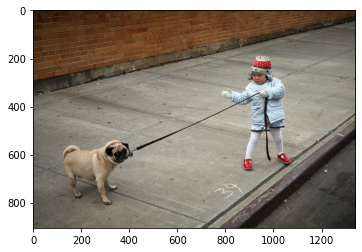

In [5]:
# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb);

#### c. Displaying Images in New Window

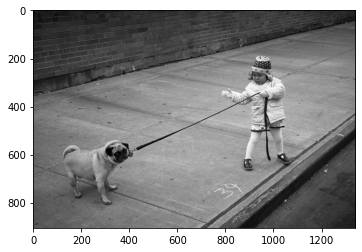

In [6]:
# Converting image to gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Plotting the grayscale image
plt.imshow(gray_image,cmap='gray');

#### d. Visualizing Color Channels

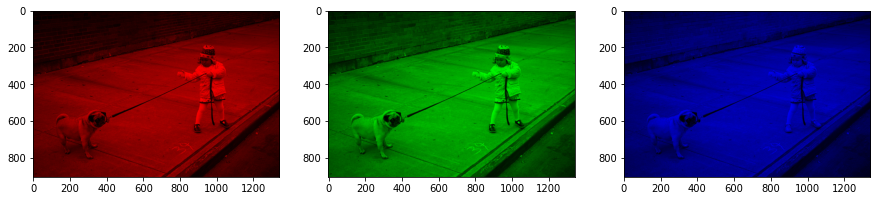

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,15))

r = image.copy()
# set blue and green channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0

g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

b = image.copy()
# set red and green channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0

ax[0].imshow(r)
ax[1].imshow(g)
ax[2].imshow(b);

#### e. Edge Detection

**Fun Fact:** Canny Edge detection was developed by John Canny, a UC Berkeley Computer Science Professor!

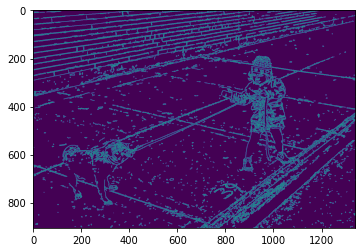

In [8]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges);

#### f. Saving Images

In [9]:
# Saves image too your current directory
cv2.imwrite('edges.jpg',edges)

True

## II. Images

<a id='pretrained'></a>
### i. Pretrained YOLO Model on Images

We'll use a YOLO model `yolo.h5` that was trained off the 80 objects in the COCO dataset. We can simply pass in an image into `detector.detectObjectsFromImage(...)` and it will output a copy of the image with the bounding boxes labeled as well as a list called `detections` that contains the detected objects.

- `minimum_percentage_probability` determines the threshold for the objects to return in `detections`. Only images with a confidence probability above this threshold will be stored in detections and surrounded by a bounding box. 

Reference: https://imageai.readthedocs.io/en/latest/detection/index.html

In [11]:
from imageai.Detection import ObjectDetection
import os
import warnings
warnings.filterwarnings("ignore")

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

In [12]:
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "data/city.jpg"), 
                                             output_image_path=os.path.join(execution_path , "city_new.jpg"), 
                                             minimum_percentage_probability=50)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

handbag  :  56.59630298614502  :  [261, 2625, 494, 3008]
--------------------------------
traffic light  :  87.68088817596436  :  [5077, 565, 5365, 1286]
--------------------------------
traffic light  :  93.17172169685364  :  [2546, 1032, 2761, 1509]
--------------------------------
car  :  84.49753522872925  :  [0, 2847, 5088, 3648]
--------------------------------
car  :  94.76352334022522  :  [1404, 1941, 2296, 2370]
--------------------------------
car  :  95.52768468856812  :  [2976, 1884, 3455, 2280]
--------------------------------
bicycle  :  93.20038557052612  :  [2293, 2346, 2913, 2926]
--------------------------------
person  :  51.930058002471924  :  [176, 1979, 353, 2355]
--------------------------------
person  :  98.4228789806366  :  [401, 1936, 989, 3062]
--------------------------------
person  :  98.96107316017151  :  [3679, 1750, 4000, 2778]
--------------------------------
person  :  99.33969378471375  :  [3483, 1860, 3722, 2713]
--------------------------------
pe

<a id='bounding-boxes'></a>
### ii. Bounding Boxes

Detected objects are stored in a list of dictionaries called `detections`. Each dictionary represents one bounding box in the image and each bounding box has 3 attributes.
- `'name'`: Predicted label for the bounding box
- `'percentage_probability'`: The probability the box contains the predicted object.
- `'box_points'`: [x1, y1, x2, y2], a list containing the coordinate of the bounding box. (x1, y1) is the upper left coordinate and (x2, y2) is the lower right coordinate.

In [13]:
# View first 3 dictionaries or bounding boxes
detections[0:3]

[{'name': 'handbag',
  'percentage_probability': 56.59630298614502,
  'box_points': [261, 2625, 494, 3008]},
 {'name': 'traffic light',
  'percentage_probability': 87.68088817596436,
  'box_points': [5077, 565, 5365, 1286]},
 {'name': 'traffic light',
  'percentage_probability': 93.17172169685364,
  'box_points': [2546, 1032, 2761, 1509]}]

The model also outputs a the original image with the bounding boxes overlaid. We saved this image as `city_new.jpg`.

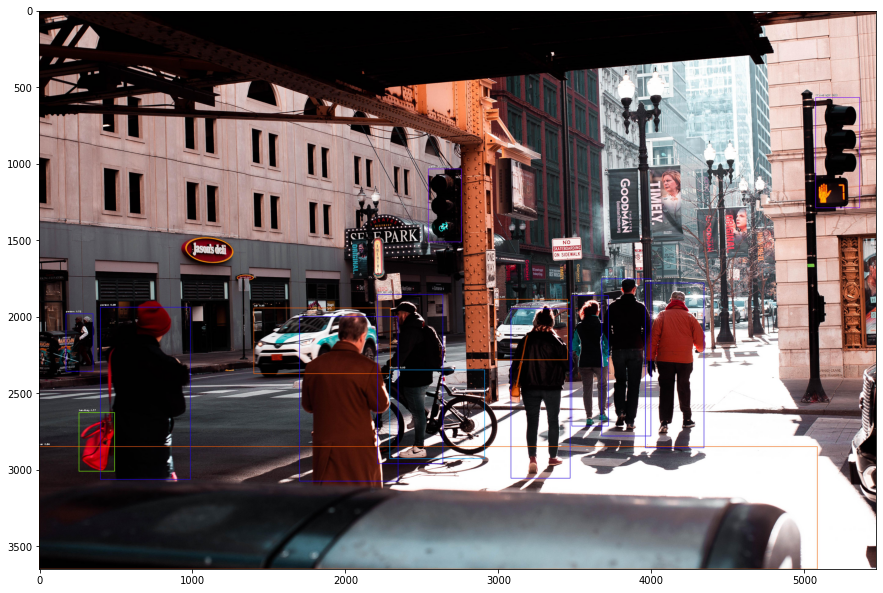

In [14]:
pedestrians_new = cv2.imread('city_new.jpg')

# Remember images are read in as Blue-Green-Red by default, so we must convert it to Red-Green-Blue (RGB) for the picture to appear in the right colors.
city_new_rgb = cv2.cvtColor(pedestrians_new,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (15,15))
plt.imshow(city_new_rgb);

<a id='cropping'></a>
### ii. Cropping Images

In [15]:
def crop(img, box_points):
    """Takes in a `img` an image OpenCV object and `box_points` which is a list containg the upper left and lower right coordinates of the bounding box to crop out. For example,
    box_points should be [x1, y1, x2, y2]."""
    x1 = box_points[0]
    y1 = box_points[1]
    x2 = box_points[2]
    y2 = box_points[3]
    
    crop_img = img[y1:y2, x1:x2]
    return crop_img

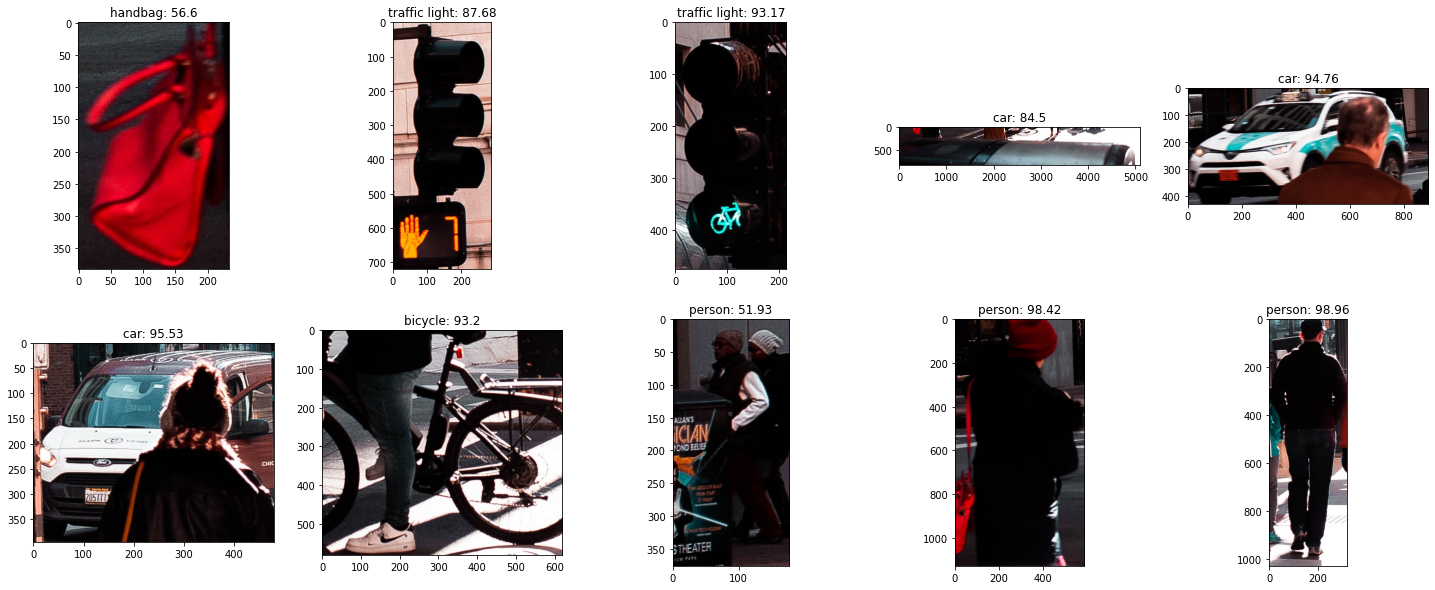

In [18]:
pedestrians = cv2.imread('data/city.jpg')
pedestrians = cv2.cvtColor(pedestrians,cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2 , 5, figsize=(25,10))
count = 0
i=0
# We'll crop out and visualizate the first 5 objects.
for d in detections[0:10]:
    if count==5:
        i=1
        count=0
    crop_img = crop(pedestrians, d['box_points'])
    ax[i,count].set_title(d['name'] + ': ' + str(round(d['percentage_probability'],2)))
    ax[i,count].imshow(crop_img)
    count +=1 

<a id='drawing'></a>
### iii. Drawing on Images

OpenCV can be used to place shapes on top of images. We can draw a variety of shapes including circles, rectangles, and ellipses as well as add text to images. ImageAI actually uses OpenCV behind the scenes to draw the bounding boxes in the image it outputs. 

Reference: https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html

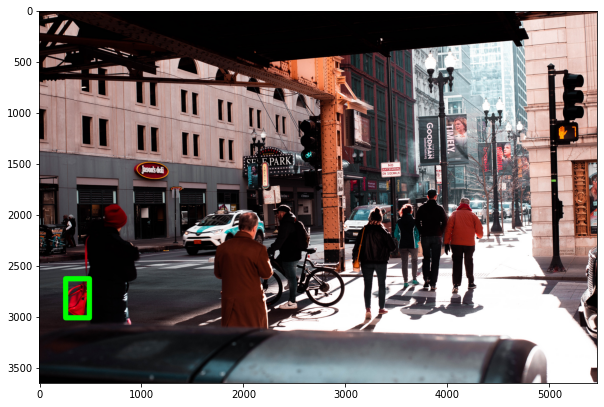

In [19]:
def get_coordinates(box_points):
    """Takes box_points in the form of [x1, y1, x2, y2] and returns the coordinates as two tuples (x1, y1) and (x2, y2)."""
    x1 = box_points[0]
    y1 = box_points[1]
    x2 = box_points[2]
    y2 = box_points[3]
    return (x1, y1), (x2, y2)

# Draw a green box around the first detected object
object0 = detections[0]
upper_left, lower_right = get_coordinates(object0['box_points'])

img_text = cv2.rectangle(pedestrians, upper_left, lower_right,(0,255,0),50)

plt.figure(figsize = (10,10))
plt.imshow(img_text);

## II. Videos

<a id='pretrained-videos'></a>
### i. Pretrained YOLO on Videos

The following code breaks a video down into frames and runs YOLO on each of the frames. The main method `detector.detectObjectsFromVideo(...)` takes in a video and outputs another video (.avi format) with the bounding boxes labeled in the current directory. Note that the following code block may take a few minutes to complete.

Reference: https://imageai.readthedocs.io/en/latest/video/index.html

In [20]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "data/dog_playing_Trim.mp4"),
                                             output_file_path=os.path.join(execution_path, "dog_playing_detected"), 
                                             frames_per_second=20,
                                             log_progress=True)
print(video_path)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

<a id='displaying-videos'></a>
### ii. Displaying and Saving Videos

This section displays the output video with the labeled bounding boxes in a new window using OpenCV. Reference: https://docs.opencv.org/3.4/dd/d43/tutorial_py_video_display.html
  - `cv.waitKey(x)`: controls the speed the video is played. `x` specifies the number of milliseconds to wait before moving onto the next frame.
  - `q`: The key that when pressed will close the window displaying the video. When the `q` key is pressed, the new window will terminate immediately. Alternatively, the window will close when the video is over. 
 
 The following code will open a new window and display this: <br>
 ![SegmentLocal](assets/detected_sample.gif "segment")

In [21]:
#import numpy as np
#import cv2
#
## Read in video file
#cap = cv2.VideoCapture('dog_playing_detected.avi')
#
#while cap.isOpened():
#    
#    # Checks if video is read in correctly
#    ret, frame = cap.read()
#    
#    # if frame is read correctly ret is True
#    if not ret:
#        print("Can't receive frame (stream end?). Exiting ...")
#        break
#    
#    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#    frame_rgb_resized = cv2.resize(frame_rgb, (960, 540)) 
#    cv2.imshow('frame', frame_rgb_resized)
#    
#    # Waits 6 milliseconds to see if the the 'q' key is pressed. If 'q' is pressed, the video stops and the window closes, else moves on to next frame.
#    if cv2.waitKey(6) == ord('q'):
#        break
#cap.release()
#cv2.destroyAllWindows()

You might have realized that the ImageAI YOLO implementation returns an output video in BGR as a .avi file. (If you open the directory that this notebook is in and open the output .avi file you'll notice that the colors are incorrect.) The following code converts the image to RGB so the video will be in the correct colors, saves the image as a .mp4 file, and displays the video once more. Notice how the code is very similar to the code to display the video in the cell above. 

In [22]:
import numpy as np
import cv2

# Read in video file (can be a .mp4 or .avi file)
cap = cv2.VideoCapture('dog_playing_detected.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')


out = cv2.VideoWriter('dog_playing_detected_rgb.mp4',fourcc, 20.0, (854, 480))

while(cap.isOpened()):
    # Checks if video is read in correctly
    ret, frame = cap.read()
    
    if ret==True:    
        # Convert to RGB and resize frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb_resized = cv2.resize(frame_rgb, (854, 480))
           
        # Write the current frame to the output video and display the video.
        out.write(frame_rgb_resized)
        #cv2.imshow('frame', frame_rgb_resized)

        # Waits 1 milliseconds to see if the the 'q' key is pressed. If 'q' is pressed, the video stops and the window closes, else moves on to next frame.
        #if cv2.waitKey(1) & 0xFF == ord('q'):
        #    break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
#cv2.destroyAllWindows()

If you open your current directory in a file explorer you should be able to verify that `dog_playing_detected.mp4` exists and has the correct colors. 

<a id='applying-functions'></a>
### iii. Applying Functions to Video Frames

Object detection is often used to count objects or track movement throughout a video. This requires recording data from video frames. We can use ImageAI to apply a function to each frame of the video to extract and collect information from a frame. In this section, we demonstrate how to count the number of objects detected in each frame of the video.

Reference: https://imageai.readthedocs.io/en/latest/video/index.html

In [23]:
# Define a global variable to store the frame_counts dictionaries for each frame.
frame_counts = []    

def forFrame(frame_number, output_arrays, count_arrays):
    
    # count_arrays is a dicitionary created for each frame where the keys are the labels and the values are the number of that type of object
    frame_counts.append(count_arrays)
    
    # For the first 5 frames we'll print out the data that can be collected for each frame. 
    if frame_number <= 5:
        print("FRAME NUMBER : ", frame_number)
        print("Array for the outputs of each frame ", output_arrays)
        print("Array for output count for unique objects in each frame : ", count_arrays)
        print("------------END OF FRAME--------------")
    
# Pass video into YOLO model and detect objects
video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolo.h5"))
video_detector.loadModel()
video_detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "data/dog_playing_Trim.mp4"), 
                                      output_file_path=os.path.join(execution_path, "dog_playing_detected_function"),
                                      frames_per_second=20, 
                                      per_frame_function =forFrame,  
                                      minimum_percentage_probability=30,
                                      log_progress=True)

Processing Frame :  1
FRAME NUMBER :  1
Array for the outputs of each frame  [{'name': 'bear', 'percentage_probability': 39.53888714313507, 'box_points': [751, 575, 1307, 1308]}, {'name': 'elephant', 'percentage_probability': 59.33555364608765, 'box_points': [751, 575, 1307, 1308]}, {'name': 'dog', 'percentage_probability': 69.8113203048706, 'box_points': [742, 577, 1328, 1288]}, {'name': 'person', 'percentage_probability': 99.88740086555481, 'box_points': [1208, 98, 1658, 1235]}]
Array for output count for unique objects in each frame :  {'bear': 1, 'elephant': 1, 'dog': 1, 'person': 1}
------------END OF FRAME--------------
Processing Frame :  2
FRAME NUMBER :  2
Array for the outputs of each frame  [{'name': 'elephant', 'percentage_probability': 95.44939398765564, 'box_points': [725, 596, 1291, 1304]}, {'name': 'dog', 'percentage_probability': 36.339521408081055, 'box_points': [750, 612, 1388, 1277]}, {'name': 'person', 'percentage_probability': 99.80490207672119, 'box_points': [120

'/Users/afo/dev/scet-datax/datax/03-data-x-data-handling/m330-YOLO-object-detection/dog_playing_detected_function.avi'

For each frame in the video, we store a dictionary that contains the counts for each label. Let's see what YOLO detected in the first 5 frames by slicing `frame_counts`.

In [24]:
print('Number of Frames: ', len(frame_counts))
print('Detected object count for first 5 frames: ')
frame_counts[0:5]

Number of Frames:  145
Detected object count for first 5 frames: 


[{'bear': 1, 'elephant': 1, 'dog': 1, 'person': 1},
 {'elephant': 1, 'dog': 1, 'person': 1},
 {'elephant': 1, 'person': 1},
 {'elephant': 1, 'person': 1},
 {'elephant': 1, 'person': 1}]

You should notice that YOLO made some mistakes. It sometimes thought the dog was a bear or elephant!

<a id='mistakes'></a>
### iv. Counting YOLO Errors
We know the video only contains a dog and person, so any other detected objects are errors. We are going to create a bar graph to show what other objects were detected and how often. 

In [25]:
# Get unique objects detected
unique_labels = set()
for frame_objects in frame_counts:
    for label in frame_objects.keys():
        unique_labels.add(label)
unique_labels

{'backpack',
 'bear',
 'cat',
 'dog',
 'elephant',
 'frisbee',
 'handbag',
 'person',
 'surfboard',
 'umbrella'}

Next, we will create a DataFrame that shows how many video frames each label appeared in. If the model was 100% accurate, the dog and person label should appear in all 145 frames. 

In [26]:
import pandas as pd

counts = {}

# Initialize each label with a count of 0
for label in unique_labels:
    counts[label] = 0

# Loop through each frame and count the labels within each frame
for frame_objects in frame_counts:
    for label in unique_labels:
        if label in frame_objects.keys():
            counts[label] += 1
            
df_counts = pd.DataFrame({'Labels': list(counts.keys()), 'Number of Frames': list(counts.values())})
df_counts.sort_values(by = 'Number of Frames', ascending = False, inplace = True)
df_counts.reset_index(inplace =True, drop = True)
df_counts

,Labels,Number of Frames
0,dog,137
1,person,135
2,cat,13
3,elephant,12
4,surfboard,9
5,umbrella,7
6,bear,6
7,frisbee,3
8,handbag,2
9,backpack,1


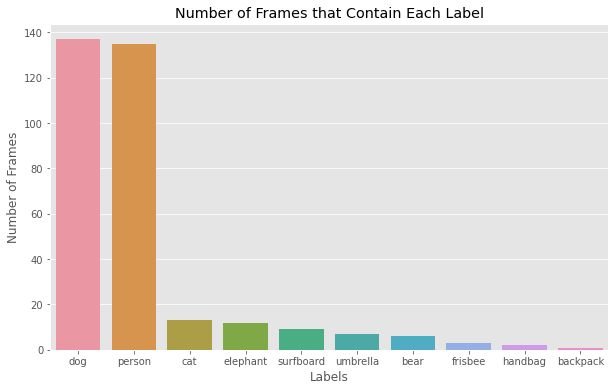

In [27]:
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Number of Frames that Contain Each Label')
sns.barplot(x = 'Labels', y ='Number of Frames', data = df_counts);

 -  To avoid detecting these objects that don't exist, we can try to increase the `minimum_percentage_probability`. This will help if the incorrect labels have lower probability confidence scores. 
 - We can also average the object counts over some time period. For example, we can look at the average number of dogs over all frames within a second. Because the incorrect objects are detected infrequently, on average they will have low frame counts. Check out the `per_second_function` and `per_minute_function` functions 
(https://imageai.readthedocs.io/en/latest/video/index.html) on the ImageAI documentation to see how to implement this.


<a id='custom-training'></a>
## III. Custom Trained Models

The above examples used a pretrained model, so we could only predict the 80 objects found in the COCO dataset. ImageAI also provides methods to train your own models, so you can build a model to identify new objects. This can be labor intensive because you will need to find images and/or videos of your new object and then manually create the bounding box labels. You can read about training your own YOLO model at the [ImageAI documentation](https://imageai.readthedocs.io/en/latest/customdetection/index.html). 

## IV. Resources and Further Reading
- Darknet YOLO implementation: https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/
- ImageAI Official Documentation: https://imageai.readthedocs.io/en/latest/index.html